## Python statistics essential training - 03_01_visualization

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
# lets explore the data, i will look at 200 rows in 20-row steps

gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


In [6]:
# gapminder[gapminder.region == 'America']

In [7]:
# the last two columns are given in 2011 equivalent dollars... 
# also gdp definitions arent static over the past 30 yrs

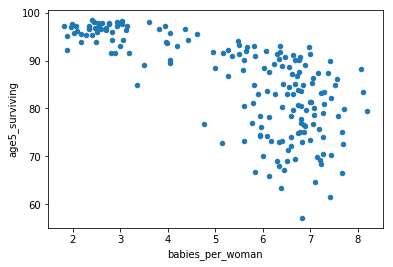

In [8]:
# for some preliminary visualization, im curious what the relationship is between #babies woman have and 
# child mortality... lets take a look.
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman', 'age5_surviving')

In [9]:
# we can see a negative correlation indicating that, on average, more children are born when 
# child survivability is less. Here i try an interactive plot.

def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                     s=area,c=colors,
                     linewidths=1,edgecolors='k',
                     figsize=(12,9))
    
    plt.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    plt.xlabel('babies per woman',fontsize=14)
    plt.ylabel('% children alive at 5 yrs',fontsize=14)
    
    


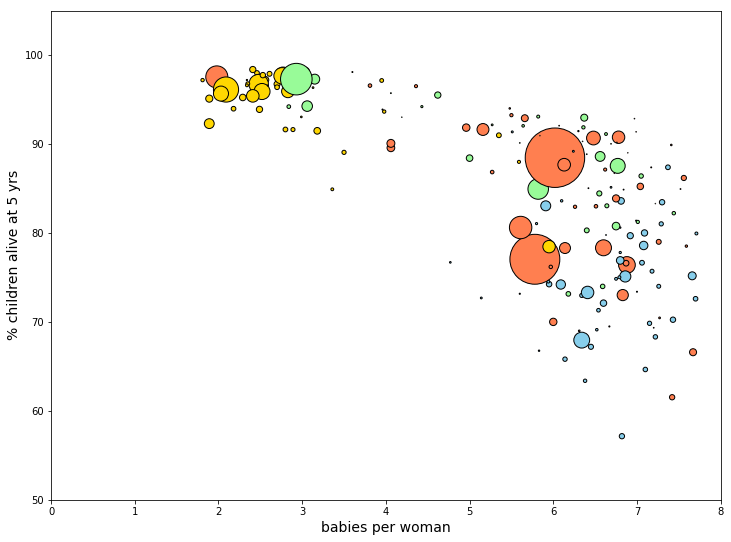

In [10]:
plotyear(1965)

In [11]:
#lets make it interactive by using ipython widgets
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))
plt.savefig('childnatalityvmortality')

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<Figure size 432x288 with 0 Axes>